# ST 590-651 Project 2 Part 3: NFL Football Scores Data Analysis

*Performed by Group G: Raiden Han, Jingjing Li, Nataliya Peshekhodko*

*06/27/2022*

In [1]:
# Prepare the environment for Windows operation systems
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark import SparkFiles

# Create a new Spark session
spark = SparkSession.builder.master(
    "local[4]").appName("my_app").getOrCreate()

# Configurate the Spark session
ps.set_option("compute.default_index_type", "distributed")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", True)

In [3]:
# Read the .csv file from the url
url = 'https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv'
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("scoresFull.csv"), header=True)

In [4]:
# Identify numerical variables
num_vars = ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'AFinal',
            'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HFinal']
quarter_vars = ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'HQ1', 'HQ2', 'HQ3', 'HQ4']
# Calculate the mean
avg = df.agg({var: 'avg' for var in num_vars})
avg.show()

+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+
|      avg(AFinal)|        avg(AQ3)|         avg(HQ2)|      avg(HFinal)|         avg(AQ4)|         avg(HQ1)|          avg(AQ1)|         avg(HQ3)|         avg(HQ4)|         avg(AQ2)|
+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+
|20.55718813022184|4.38692019590896|7.105157015269374|23.17401325266494|5.890233362143475|4.828867761452031|3.9248055315471047|4.791126476519735|6.322961682512244|6.241428983002017|
+-----------------+----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-----------------+-----------------+



In [5]:
# Calculate the standard deviation
std = df.agg({var: 'std' for var in num_vars})
std.show()

+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|    stddev(AFinal)|      stddev(AQ3)|       stddev(HQ2)|    stddev(HFinal)|      stddev(AQ4)|      stddev(HQ1)|      stddev(AQ1)|      stddev(HQ3)|      stddev(HQ4)|       stddev(AQ2)|
+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+
|10.195585841440776|4.632716825002489|5.7027880761372725|10.405951744024184|5.278775371882617|4.726903424009668|4.490700421089049|4.755144845943295|5.417310283450343|5.2215934529573085|
+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+



In [6]:
# Calculate the mean grouped by seasons
avg_by_season = df.groupby('season').agg({var: 'avg' for var in num_vars})
avg_by_season.show()

+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|season|       avg(AFinal)|          avg(AQ3)|          avg(HQ2)|       avg(HFinal)|          avg(AQ4)|          avg(HQ1)|          avg(AQ1)|          avg(HQ3)|          avg(HQ4)|          avg(AQ2)|
+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  2012|21.655430711610485|  4.50936329588015|  7.00374531835206|24.119850187265918| 6.235955056179775| 4.928838951310861| 4.468164794007491| 5.217228464419476| 6.823970037453184| 6.273408239700374|
|  2014|21.295880149812735| 4.734082397003745| 7.164794007490637|23.973782771535582| 5.876404494382022| 4.913857677902621| 4.284644194756554| 5.397003745318352|6.3745318352059925| 6.322097378277154|
|  20

In [7]:
# Calculate the standard deviation grouped by seasons
std_by_season = df.groupby('season').agg({var: 'std' for var in num_vars})
std_by_season.show()

+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+
|season|    stddev(AFinal)|       stddev(AQ3)|       stddev(HQ2)|    stddev(HFinal)|       stddev(AQ4)|      stddev(HQ1)|       stddev(AQ1)|       stddev(HQ3)|      stddev(HQ4)|      stddev(AQ2)|
+------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+
|  2012| 10.36700586582552| 4.627771103085967| 5.379925180001318| 10.55991939940039| 5.338234491542525|4.504654209720631| 4.754293429927693|4.5427794268808634|5.675672459168211|5.452819233053018|
|  2014| 9.780605611153137|5.0598373811825486|  6.11381680118567|10.870878612249262| 5.243299106476734|4.821247898934106| 4.893745832711619|5.1845336805684195|5.329216822540802|  4.7692229255708|
|  2013| 9.680199379

In [8]:
# Convert the Pyspark.SQL DataFrame to a Pandas DataFrame
avg_by_season_df = avg_by_season.toPandas()
# Change the column names
avg_by_season_df.columns = [col.replace("avg(", "").replace(")", "")
                            for col in avg_by_season_df.columns]
# Set the season as the index
avg_by_season_df.sort_values('season', inplace=True)
# avg_by_season_df['season'] = pd.to_datetime(avg_by_season_df['season'])
avg_by_season_df.set_index('season', inplace=True)
# Select the columns with interest
avg_by_season_df = avg_by_season_df[quarter_vars]
avg_by_season_df.head()

,AQ1,AQ2,AQ3,AQ4,HQ1,HQ2,HQ3,HQ4
season,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,4.307116,7.411985,4.715356,6.426966
2003,3.558052,6.093633,3.913858,5.355805,5.026217,6.625468,4.561798,6.295880
2004,3.913858,6.265918,4.153558,5.797753,4.943820,7.071161,4.250936,6.561798
2005,3.887640,5.543071,4.029963,5.191011,4.393258,7.426966,4.677903,5.737828
2006,3.629213,6.179775,4.303371,6.063670,4.606742,6.041199,4.565543,5.932584


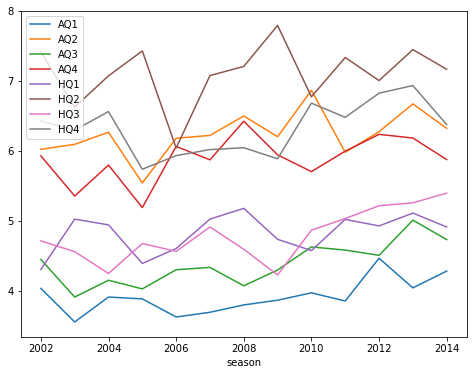

In [9]:
# Plot the quarter variables
fig, ax = plt.subplots(figsize=(8, 6))
avg_by_season_df.plot(ax=ax)
plt.show()